In [1]:
""""
ONE HOUR DATA: DIFFICULT TO PREDICT, HUMANS ARE UNPREDICTIBLE IN SHORT TERM
ONE WEEK: 
ONE MONTH DATA: SHOULD BE EASY TO PREDICT, BUT MAYBE WE DONT HAVE ENOUGH MONTHS?

""""


SyntaxError: EOL while scanning string literal (<ipython-input-1-f3b8b3ce6b64>, line 6)

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('default')

df=pd.read_csv('/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_10s.csv',header=0,delimiter='\t', parse_dates=['datetime'])
df=df.set_index(['datetime'])
dwelling_id = 'P01S02W4953'


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def resample_df(df, sample_rate):

    df = df.drop(['gasPower'], axis=1) # Drop gasPower, calculate it again later
    
    to_sum = ['eMeterReturn', 'eMeterLow', 'eMeterLowReturn', 'ePower', 'ePowerReturn'] # resampler.sum() these columns
    to_last = ['gasMeter', 'eMeter'] # resample.last(), take last known value from the columns
    
    df[to_sum] = df[to_sum].resample(sample_rate).sum() # sum values
    df[to_last] = df[to_last].resample(sample_rate).last() # take last value moest nearby the sample_rate
    df = df.resample(sample_rate).mean() # resample to 1H by mean (this wont change the values calculated by .sum() and .last())
    
    # Calculate gasPower
    df['gasPower'] = df['gasMeter'].diff()
    df['gasPower'][0] = df['gasPower'][1] # Replace 1st entry (NaN) with 2nd entry
    
    return df



In [4]:
df = df.dropna()

df1h =  resample_df(df, 'H')
df3h = resample_df(df, '3H')
df6h = resample_df(df, '6H')
df12h = resample_df(df, '12H')
df1d = resample_df(df, 'D')
df1w = resample_df(df, '7D')
df1m = resample_df(df, '1M')



In [14]:
df1w=df1w[np.isfinite(df1w['gasPower'])]
df1w

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,Q,RG,SQ,T,T10,TD,U,VV,WW,gasPower
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 12:00:00,808.537,0.0,4.412833e+07,0.0,22316525.5,0.0,1627.714,216.869179,36.715523,3.998850,...,200.932236,0.072984,3.017780,8.408715,7.945233,3.222434,71.453929,35787.754731,13.259641,19.249
2017-05-01 12:00:00,841.621,0.0,4.627856e+07,0.0,25158862.0,0.0,1646.963,126.294229,51.076008,4.125202,...,147.939501,0.092178,1.448681,10.737861,10.570012,7.518731,80.831347,22480.712540,11.928240,19.249
2017-05-08 12:00:00,865.318,0.0,4.845196e+07,0.0,20892044.5,0.0,1656.031,172.588115,28.722440,3.427633,...,227.278387,0.077280,3.419347,12.507470,12.004059,7.861292,74.827756,25636.025435,9.522036,9.068
2017-05-15 12:00:00,888.847,0.0,5.064843e+07,0.0,14618980.5,0.0,1657.909,178.889253,23.090702,3.778485,...,216.852895,0.021283,2.847215,16.607789,16.292916,10.790934,70.643608,34546.882631,6.917693,1.878
2017-05-22 12:00:00,905.555,0.0,5.175581e+07,0.0,17640845.5,0.0,1660.025,180.854343,0.291749,3.417387,...,297.159820,0.000000,4.893587,18.749075,18.643956,12.194801,67.821262,33105.039111,3.657102,2.116
2017-05-29 12:00:00,927.748,0.0,5.375759e+07,0.0,14930253.5,0.0,1661.244,216.899068,3.424807,3.286155,...,284.072033,0.019137,4.467461,17.758113,17.850393,12.022932,70.551718,28290.590010,4.211163,1.219
2017-06-05 12:00:00,943.343,0.0,5.510232e+07,0.0,14686321.5,0.0,1662.701,217.959079,43.386038,6.473458,...,221.778779,0.148358,2.906164,16.962194,16.694603,11.253130,69.933041,29354.037669,12.524766,1.457
2017-06-12 12:00:00,967.128,0.0,5.650877e+07,0.0,16618082.5,0.0,1664.827,194.710998,0.000000,3.457194,...,294.353034,0.000000,4.524660,18.654783,18.437882,12.690984,69.621739,31440.810312,2.788947,2.126
2017-06-19 12:00:00,988.668,0.0,5.700694e+07,0.0,13918621.0,0.0,1666.412,188.269180,24.545371,5.017146,...,227.595816,0.036984,3.103415,20.458264,20.436916,15.016717,72.432296,27124.370209,8.696297,1.585


In [6]:
def create_corr_matrix(df, dwelling_id, annot):
    """
    Pearson correlation coefficient matrix. 
    The Pearson correlation coefficient is a measure of the linear correlation between two variables.
    """
    plt.clf()
    %matplotlib inline
    corr = df.corr()
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True

    if annot:
        fig, ax = plt.subplots(figsize=(25,25))
    else:
        fig, ax = plt.subplots()

    fig = sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=annot, ax=ax, 
                cbar_kws={'label':'Pearson correlation coefficient [-]'})

    fig.set_title('Correlation matrix of dwelling ID: '+dwelling_id)
    fig.tick_params(axis='x', rotation=90)
    fig.tick_params(axis='y', rotation=0)

    fig = fig.get_figure()
    fig.tight_layout()
    
    fig.show()
    
    return fig

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


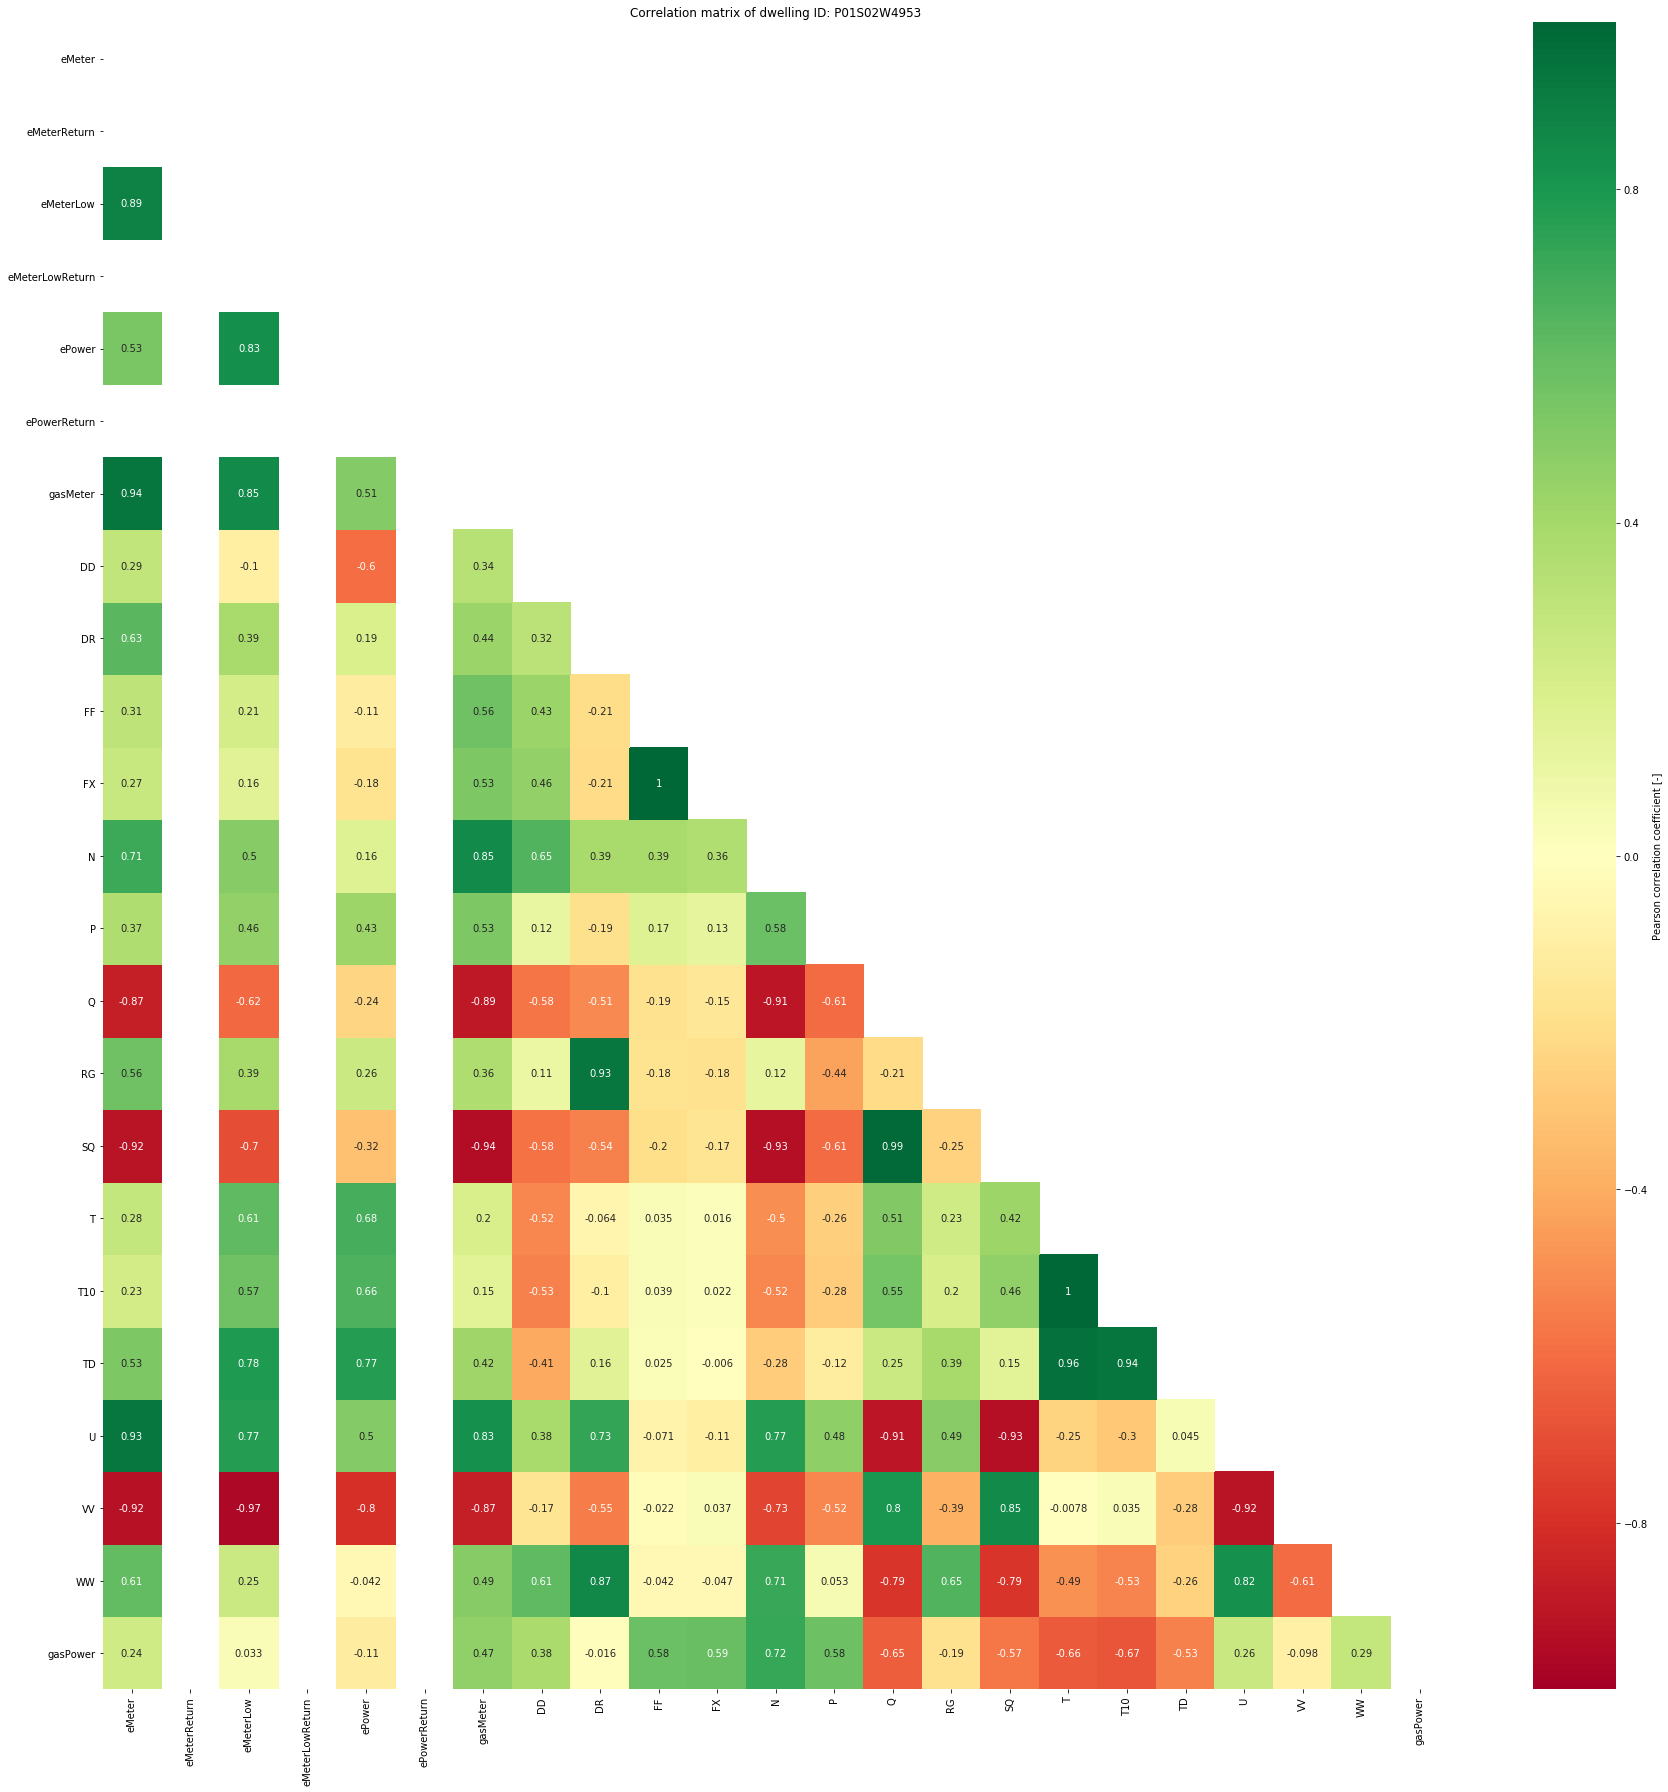

In [7]:
fig = create_corr_matrix(df1m, dwelling_id, True)

In [12]:
X = df1w[['T']][0:15]
Y = df1w['gasPower'][0:15]

X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
print('\n==============================================================================\nCOEFFICIENTES\n------------------------------------------------------------------------------\n ')
print(model.params)
print('\n==============================================================================\nMEAN SQUARED ERROR\n------------------------------------------------------------------------------\n ')
print(model.mse_total)

                            OLS Regression Results                            
Dep. Variable:               gasPower   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 12 Oct 2018   Prob (F-statistic):                nan
Time:                        11:50:03   Log-Likelihood:                    nan
No. Observations:                  15   AIC:                               nan
Df Residuals:                      13   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [9]:
[b,a]=model.params
print('Y = '+str(round(a,3))+'*T + '+str(round(b,3)))

Y = -1.764*T + 33.748


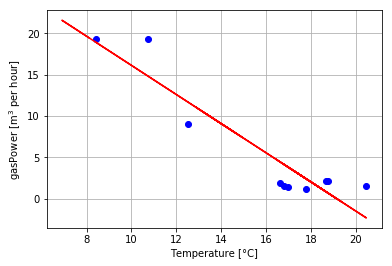

In [10]:
xx=df1w['T']
yy=a*xx+b

plt.plot(df1w['T'][0:10],df1w['gasPower'][0:10],'ob',xx,yy,'-r')
plt.grid(True)
plt.xlabel('Temperature [°C]')
plt.ylabel('gasPower [m$^3$ per hour]')
plt.show()

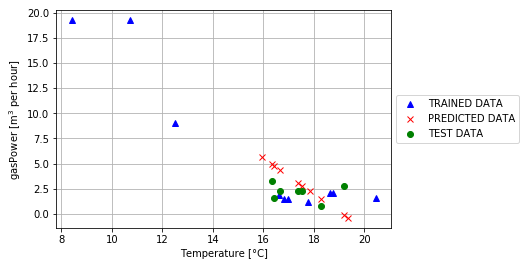

In [11]:
xx=df1w['T'][10:20]
yy=a*xx+b

plt.plot(df1w['T'][0:10],df1w['gasPower'][0:10],'b^',label='TRAINED DATA')
plt.plot(xx,yy,'rx',label='PREDICTED DATA')     
plt.plot(df1w['T'][10:20],df1w['gasPower'][10:20],'go',label='TEST DATA')

plt.grid(True)
plt.xlabel( 'Temperature [°C]')
plt.ylabel('gasPower [m$^3$ per hour]')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()